<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/15_Okt_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
from sklearn.svm import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.datasets import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import *

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

model = DecisionTreeClassifier(max_depth=3, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

y_score = model.predict_proba(X_test)[:, 1]

roc = roc_auc_score(y_test, y_score)


print('Acc', acc)
print('ROC AUC', roc)

Acc 0.9035087719298246
ROC AUC 0.90625


In [55]:
model

DecisionTreeClassifier(max_depth=3, random_state=1)

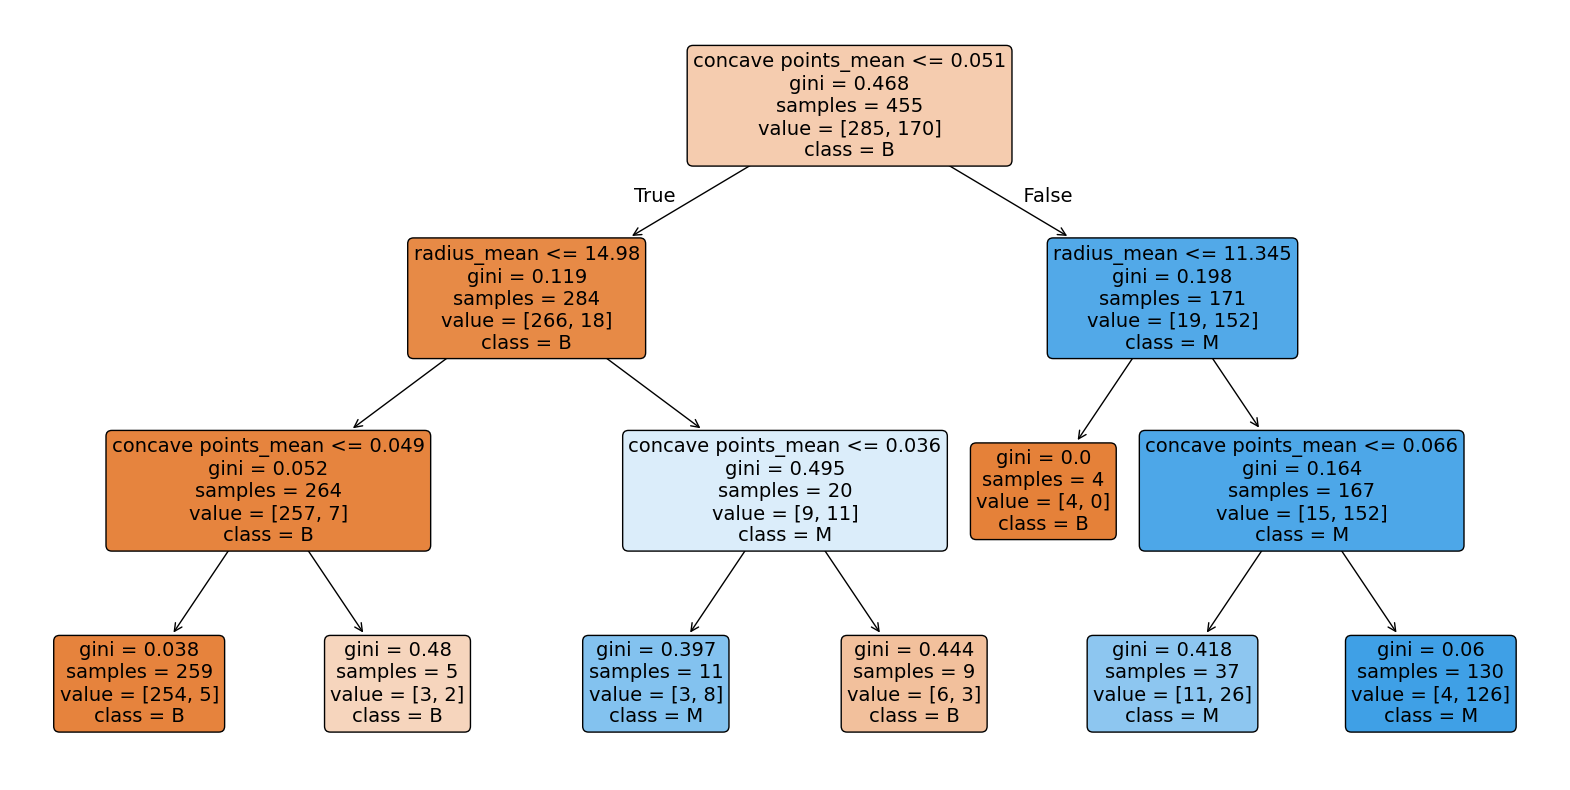

In [56]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(model,
               feature_names=X.columns.tolist(),
               class_names=['B', 'M'],
               filled=True,
               rounded=True,
               fontsize=14)
plt.show()

In [32]:
X = df[['radius_mean', 'concave points_mean']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

l_model = LogisticRegression()

l_model.fit(X_train, y_train)

y_pred = l_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

y_score = l_model.predict_proba(X_test)[:, 1]

roc = roc_auc_score(y_test, y_score)


print('Acc', acc)
print('ROC AUC', roc)

Acc 0.8771929824561403
ROC AUC 0.888558201058201
